## Read SPECFEM Syn Data and Store into Stream

In [3]:
import obspy
from obspy import Stream
from obspy import Trace
from obspy import UTCDateTime
import fnmatch
import os
import numpy as np
import pandas as pd

fdir = 'semd_data'
file_list = []
for file in os.listdir(fdir):
    if fnmatch.fnmatch(file, '*semd'):
        file_list.append(file)

syn_st = Stream()
for f in file_list:
    fqn = fdir + '/' + f
    df = pd.io.parsers.read_csv(fqn,sep="\s+",header=None, usecols=[1])
    data = df.to_numpy().astype(np.float32).flatten()
    fhdr = f.split('.')
    # Fill header attributes
    stats = {'network': fhdr[0], 'station': fhdr[1], 'location': '',
             'channel': fhdr[2], 'npts': len(data), 'delta': 0.001}
    # set current time
    stats['starttime'] = UTCDateTime()
    syn_st += Stream([Trace(data=data, header=stats)])

syn_st.filter('bandpass',freqmin=1.0,freqmax=18.0,corners=4)
#syn_st.plot()

118 Trace(s) in Stream:

NL.G203..FXZ | 2020-05-20T18:55:56.530121Z - 2020-05-20T18:56:12.913121Z | 1000.0 Hz, 16384 samples
...
(116 other traces)
...
NL.G673..FXZ | 2020-05-20T18:55:57.453789Z - 2020-05-20T18:56:13.836789Z | 1000.0 Hz, 16384 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

## Get Real Event Data

bbox after pickle :
 {'c_loop': array([[ 245534.69164335,  565634.21781808],
       [ 226284.69164335,  598976.19586378],
       [ 251399.4283531 ,  613476.19586378],
       [ 270649.4283531 ,  580134.21781808],
       [ 245534.69164335,  565634.21781808]]), 'rotdeg': 30, 'origin': array([ 245534.69164335,  565634.21781808])}


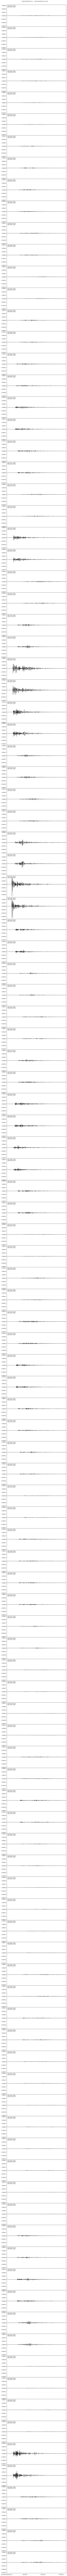

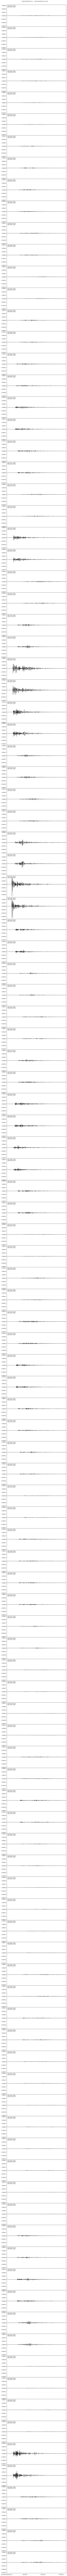

In [4]:
from gnam.events.gevents import gevents as gevents
from gnam.events.gstations import gstations as gstations
import pickle

# Unpickle
f = open('./model_bbox.pickle', 'rb')
gf_bbox = pickle.load(f)
f.close()
print('bbox after pickle :\n',gf_bbox)

f = open('./enorth.pickle', 'rb')
enorth = pickle.load(f)
f.close()

f = open('./gevents_test2.pickle', 'rb')
dill_snorth = pickle.load(f)
f.close()


#create streams
e_st3 = dill_snorth.getStreamZ(3,3)
e_st4 = dill_snorth.getStreamZ(3,4)

e_st = e_st3 + e_st4

e_st.filter('bandpass',freqmin=1.0,freqmax=18.0,corners=4)
e_st.plot()